# All the packages to install are listed here ...

In [1]:
!pip install \
numpy \
pandas \
opencv-python \
keras \
tensorflow \
pillow \
matplotlib \
scikit-learn \
scikit-image \
scipy 

# Installed packages are to be imported

In [2]:
# Import all the pacakges.
import os
import numpy as np
import pandas as pd
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

import tensorflow.keras as K

# Function to Load, Resize and view Images.

In [3]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

# Loading Some Images.


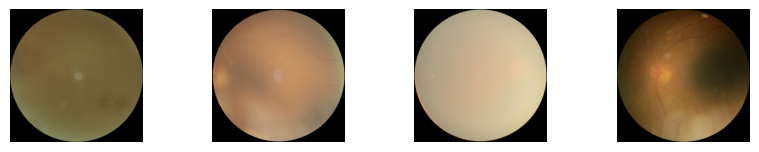

In [4]:
import os

path = 'D:/PROJECTS/Infosys/MediScan/mediscan-env/data/raw/'
data,result = load_images(path)
# print(os.getcwd())

# IMAGE PREPROCESSING.

## In order to enhance the quality of acquired eye images, including noise reduction, image  enhancement, and normalization. 



In [14]:
t = pd.Series(result,dtype='category').cat.codes

In [15]:
t

0       0
1       0
2       0
3       0
4       0
       ..
4212    3
4213    3
4214    3
4215    3
4216    3
Length: 4217, dtype: int8

In [ ]:
data_dir = 'D:/PROJECTS/Infosys/MediScan/mediscan-env/data/raw/'
import cv2 as cv
def preprocess_image(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Noise Reduction using Gaussian Blur
    image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Image Enhancement using Histogram Equalization
    image = cv2.equalizeHist(image)
    
    # Normalization to the range [0, 1]
    image = image / 255.0
    
    return image

def load_and_preprocess_images(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(category_path, file)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (512, 512))
                    image = preprocess_image(image)
                    images.append(image)
                    labels.append(category)
    return np.array(images), np.array(labels)

# Load and preprocess the images
images, labels = load_and_preprocess_images(data_dir)

# Display some preprocessed images
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(5, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

## Image Segmentation.

In [ ]:
image = plt.imread('D:\\PROJECTS\\Infosys\\MediScan\\mediscan-env\\data\\raw\\cataractDataset\\1102_left.jpg')
image.shape
plt.imshow(image)

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray)

## To Detect Multiple Objects..

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Load image
image_path = 'D:\\PROJECTS\\Infosys\\MediScan\\mediscan-env\\data\\raw\\cataractDataset\\1102_left.jpg'
image = cv2.imread(image_path)

# Convert image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = rgb2gray(image_rgb)

# Reshape grayscale image into 1D array
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

# Apply thresholding
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():  # High-intensity pixels
        gray_r[i] = 3
    elif gray_r[i] > 0.5:  # Medium-intensity pixels
        gray_r[i] = 2
    elif gray_r[i] > 0.25:  # Low-intensity pixels
        gray_r[i] = 1
    else:  # Background or very low-intensity pixels
        gray_r[i] = 0

# Reshape back to original dimensions
gray = gray_r.reshape(gray.shape[0], gray.shape[1])

# Display thresholded image
plt.imshow(gray, cmap='gray')
plt.title('Thresholded Image')
plt.show()

In [ ]:
gray.shape

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# Correctly specify the paths
raw_dataset_path = "../data/raw"  # Use raw string or double backslashes
preprocessed_dataset_path = "../data/processed"

# Set image size
IMG_SIZE = (224, 224)

# Function to preprocess a single image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Couldn't load image {image_path}. Skipping...")
        return None
    
    # Resize, blur, and normalize
    image = cv2.resize(image, IMG_SIZE)
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    image_normalized = image_blur / 255.0
    return image_normalized

# Preprocess and save images from raw dataset
def preprocess_and_save_images(dataset_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Loop through each subfolder (representing disease types)
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        save_subfolder = os.path.join(save_path, subfolder)
        
        if not os.path.exists(save_subfolder):
            os.makedirs(save_subfolder)
        
        # Process each image in the subfolder
        if os.path.isdir(subfolder_path):
            for img_file in tqdm(os.listdir(subfolder_path)):
                img_path = os.path.join(subfolder_path, img_file)
                
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image = preprocess_image(img_path)
                    if image is not None:
                        save_image_path = os.path.join(save_subfolder, img_file)
                        cv2.imwrite(save_image_path, (image * 255).astype(np.uint8))

# Call the preprocessing function
preprocess_and_save_images(raw_dataset_path, preprocessed_dataset_path)

In [ ]:
Visual

In [ ]:
import matplotlib.pyplot as plt

# Function to display original vs preprocessed images for each category
def show_examples_from_each_category(dataset_path):
    # Loop through each category (subfolder)
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        
        if os.path.isdir(subfolder_path):
            # Get a list of image files in the subfolder
            img_files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            
            if len(img_files) > 0:
                example_image_path = os.path.join(subfolder_path, img_files[0])  # Pick the first image from the category
                
                # Load original and preprocessed images
                original_image = cv2.imread(example_image_path)
                preprocessed_image = preprocess_image(example_image_path)

                # Display the original and preprocessed images side by side
                plt.figure(figsize=(10, 5))
                plt.suptitle(f"Category: {subfolder}", fontsize=16)

                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')

                plt.subplot(1, 2, 2)
                plt.imshow(preprocessed_image)
                plt.title('Preprocessed Image (Blurred & Normalized)')
                
                plt.show()

# Call the function to show examples for each category
show_examples_from_each_category(raw_dataset_path)